## _`Car Price Prediction`_

- The Plan for the Project:
  1. First, we download the dataset.
  2. Next, we do some preliminary analysis of the data.
  3. After that, we set up a validation strategy to make sure our model produces correct predictions.
  4. Then we implement a linear regression model in Python and NumPy.
  5. Next, we cover feature engineering to extract important features from the data
     to improve the model.
  6. Finally, we see how to make our model stable with regularization and use it to
     predict car prices.


### _`Import Dependencies`_


In [306]:
# Numerical Computations
import numpy as np

# For Tabular Data
import pandas as pd

# Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import category_encoders as ce # Target Encoding
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To save the model
import pickle

# Make sure that plots are rendered within the Jupyter Notebook 
%matplotlib inline

### _`Load the Dataset`_


In [307]:
df = pd.read_csv('data.csv')

# Display the first 5 rows of the dataframe
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### _`Some Info about the DataFrame & Data Preprocessin`_


In [308]:
# How many Rows and Columns are there in the dataset?
print("Number of Rows: ", df.shape[0])  # OR len(df)
print("Number of Columns: ", df.shape[1])  # OR len(df.columns)

Number of Rows:  11914
Number of Columns:  16


_`Some Inconsistencies in Column Names & Categories`_


In [309]:
# Convert Column Names to Lowercase and Replace Spaces with Underscores
# Also Convert String Values in the Columns.

df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)


for col in string_columns:

    df[col] = df[col].str.lower().str.replace(' ', '_')


df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [310]:
# Check the Metadata of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [311]:
# Check for Missing Values in the dataset
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [312]:
# Percentage of Missing Values in each Column
round(df.isna().sum() / len(df) * 100, 2)

make                  0.00
model                 0.00
year                  0.00
engine_fuel_type      0.03
engine_hp             0.58
engine_cylinders      0.25
transmission_type     0.00
driven_wheels         0.00
number_of_doors       0.05
market_category      31.41
vehicle_size          0.00
vehicle_style         0.00
highway_mpg           0.00
city_mpg              0.00
popularity            0.00
msrp                  0.00
dtype: float64

- _`Market Category Column has many missing values as 31% of Total Values -> So we will drop it`_
- _`Othe Columns that Contain any small number of missings -> We will Drop this Rows`_


In [313]:
# Method Chaining
df = df.drop(columns=['market_category'], axis=1).dropna()

# Instead of this 2 Lines of Code
# df = df.drop(columns=['market_category'], axis=1)
# df = df.dropna()

In [314]:
round(df.isna().sum() / len(df) * 100, 2)

make                 0.0
model                0.0
year                 0.0
engine_fuel_type     0.0
engine_hp            0.0
engine_cylinders     0.0
transmission_type    0.0
driven_wheels        0.0
number_of_doors      0.0
vehicle_size         0.0
vehicle_style        0.0
highway_mpg          0.0
city_mpg             0.0
popularity           0.0
msrp                 0.0
dtype: float64

In [315]:
# Check for Duplicates
df.duplicated().sum()

720

In [316]:
df.shape

(11812, 15)

_`We will drop the duplicates`_


In [317]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [318]:
df.shape

(11092, 15)

### _`Exploratory Data Analysis & Outliers Detection`_


In [319]:
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11092.000000,11092.000000,11092.000000,11092.000000,11092.000000,11092.000000,11092.000000,1.109200e+04
mean,2010.693833,253.528579,5.687973,3.450415,26.272899,19.300667,1556.681302,4.190853e+04
std,7.241249,110.184621,1.766331,0.874700,7.481404,6.605683,1443.586149,6.174305e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,172.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.153750e+04
50%,2015.000000,240.000000,6.000000,4.000000,25.000000,18.000000,1385.000000,3.059750e+04
75%,2016.000000,303.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.302250e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [320]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

num_cols, cat_cols

(Index(['year', 'engine_hp', 'engine_cylinders', 'number_of_doors',
        'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
       dtype='object'),
 Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
        'driven_wheels', 'vehicle_size', 'vehicle_style'],
       dtype='object'))

_`Explore the Distribution of Categorical Columns -> Barplot`_


In [321]:
for col in cat_cols:
    print(f'Unique values in {col}: {df[col].nunique()}')

Unique values in make: 47
Unique values in model: 903
Unique values in engine_fuel_type: 9
Unique values in transmission_type: 5
Unique values in driven_wheels: 4
Unique values in vehicle_size: 3
Unique values in vehicle_style: 16


C:\Users\mr\AppData\Local\Temp\ipykernel_14784\1904245539.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis',


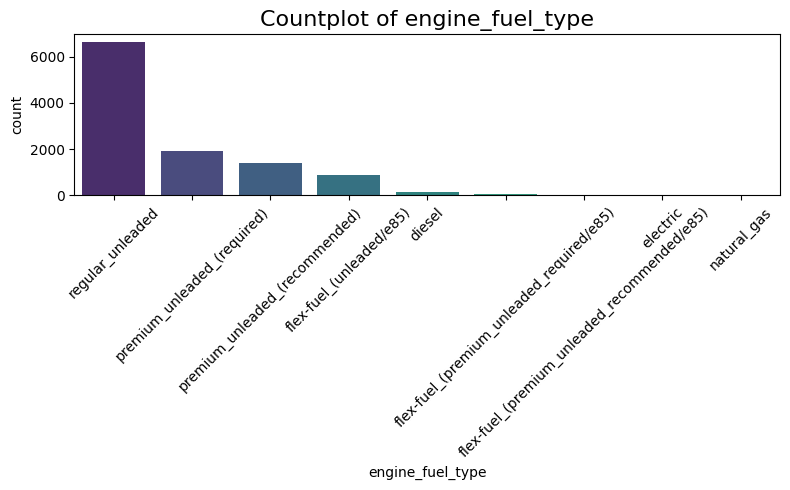

C:\Users\mr\AppData\Local\Temp\ipykernel_14784\1904245539.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis',


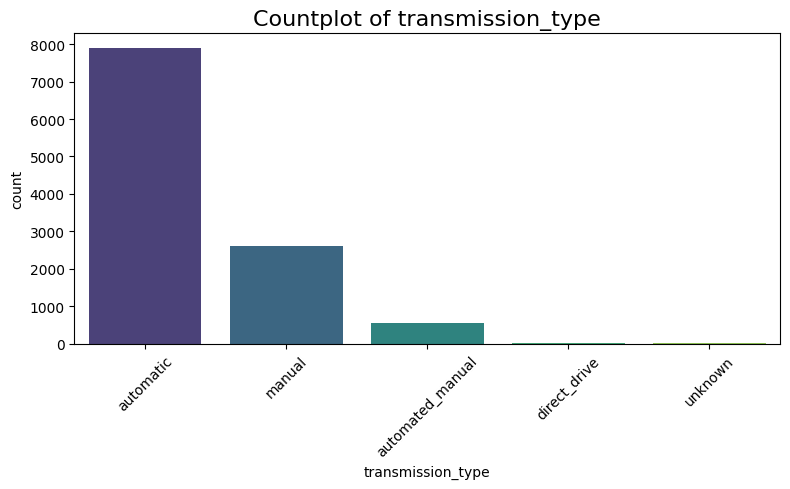

C:\Users\mr\AppData\Local\Temp\ipykernel_14784\1904245539.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis',


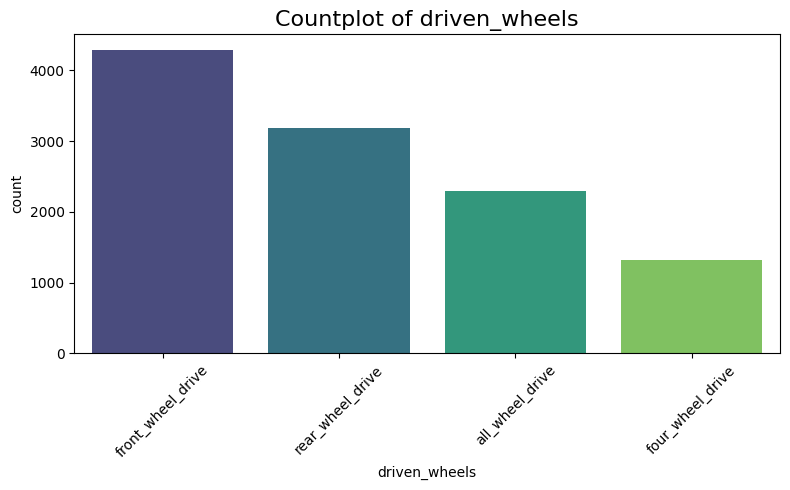

C:\Users\mr\AppData\Local\Temp\ipykernel_14784\1904245539.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis',


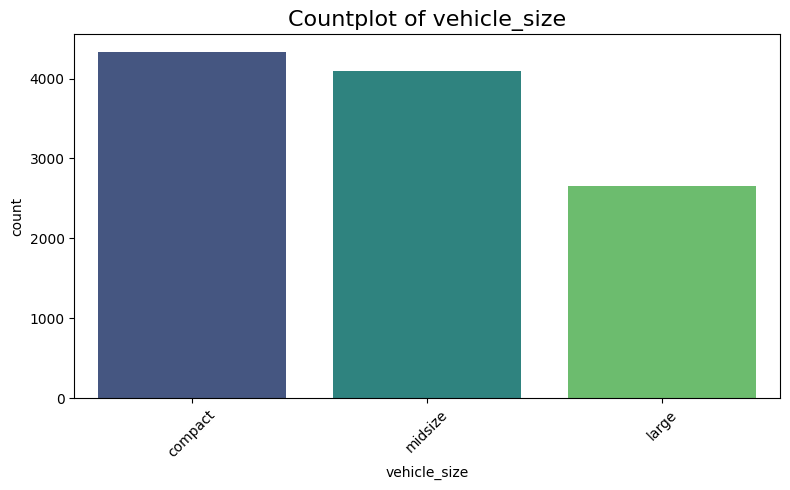

C:\Users\mr\AppData\Local\Temp\ipykernel_14784\1904245539.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis',


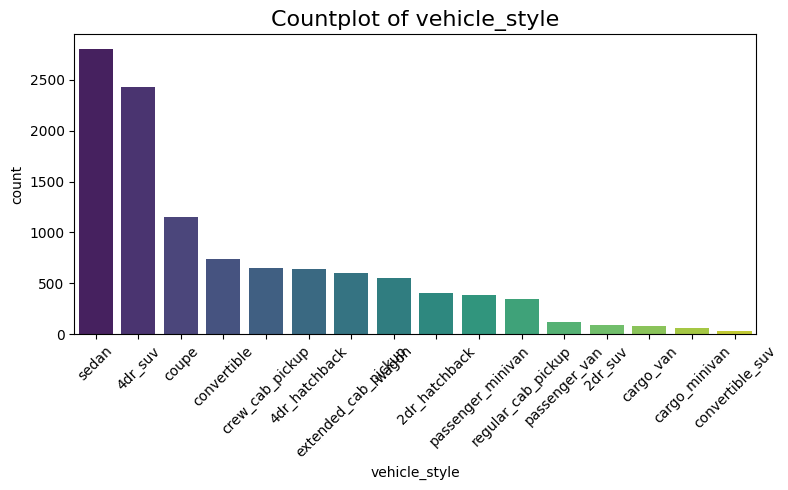

In [322]:
for col in cat_cols:
    if col not in ['make', 'model']:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=col, palette='viridis',
                      order=df[col].value_counts().index)
        plt.title(f'Countplot of {col}', fontsize=16)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

_`Explore the Numerical Discrete Columns`_


C:\Users\mr\AppData\Local\Temp\ipykernel_14784\4204266220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='coolwarm',


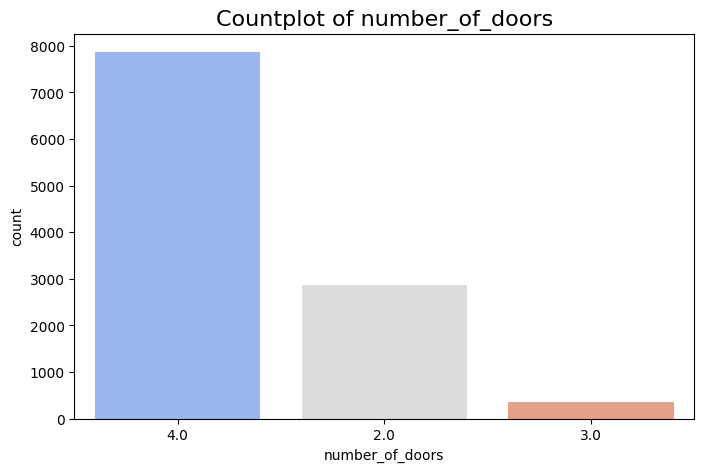

C:\Users\mr\AppData\Local\Temp\ipykernel_14784\4204266220.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='coolwarm',


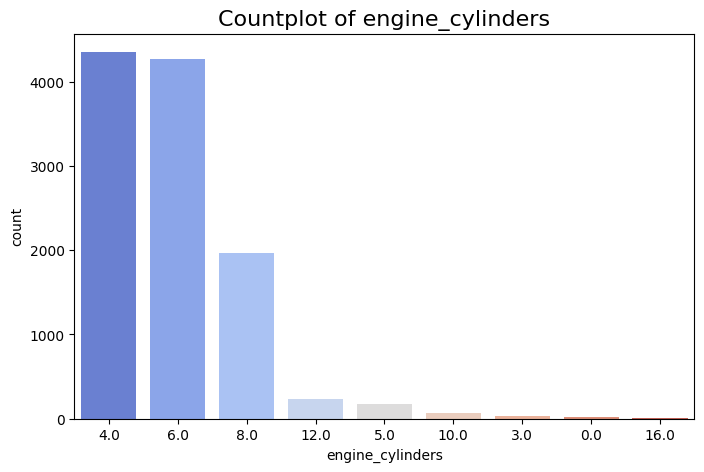

In [323]:
for col in ['number_of_doors', 'engine_cylinders']:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, palette='coolwarm',
                  order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}', fontsize=16)
    plt.show()

_`There alot of Skewness due to Outliers`_


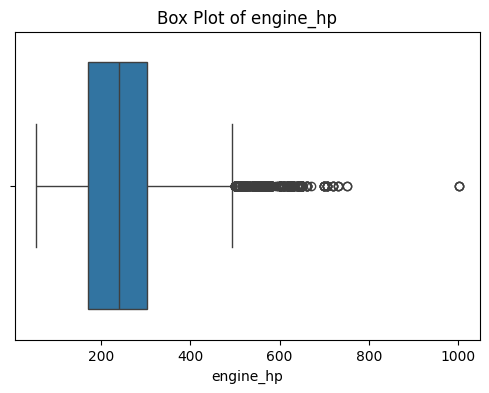

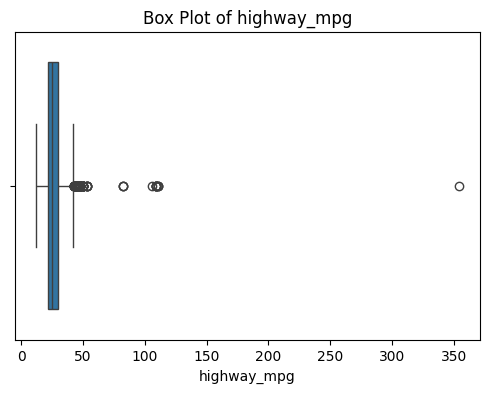

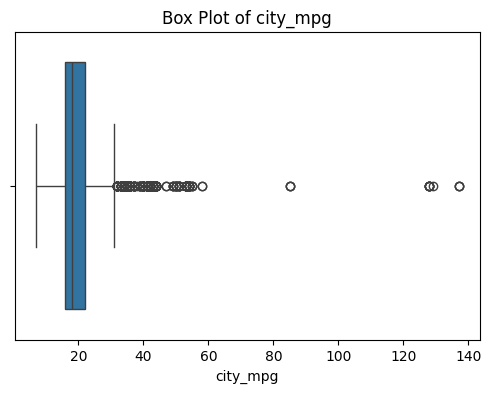

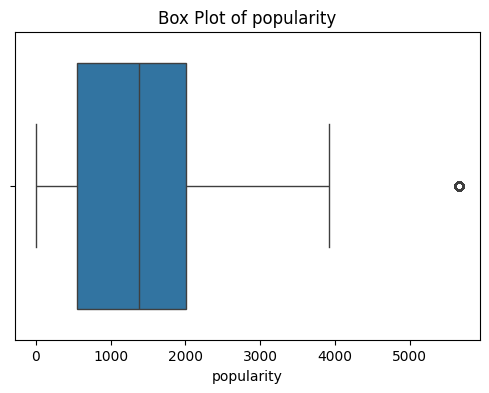

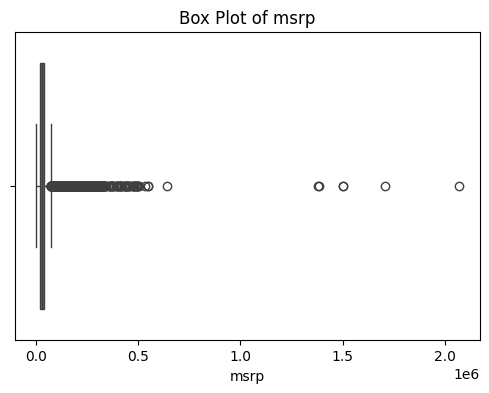

In [324]:
for col in num_cols:
    if col not in ('year', 'number_of_doors', 'engine_cylinders'):
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df, x=col)
        plt.title(f'Box Plot of {col}')
        plt.show()

_`Handle Outliers`_


Number of outliers in engine_hp: 501


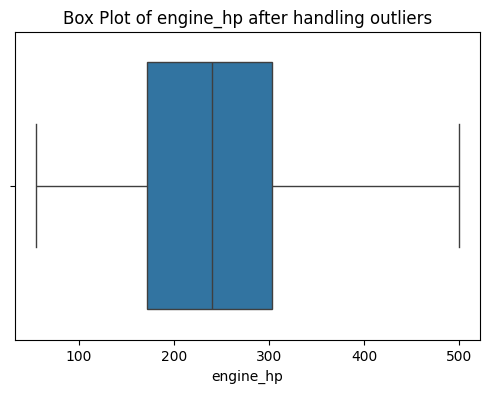

Number of outliers in highway_mpg: 129


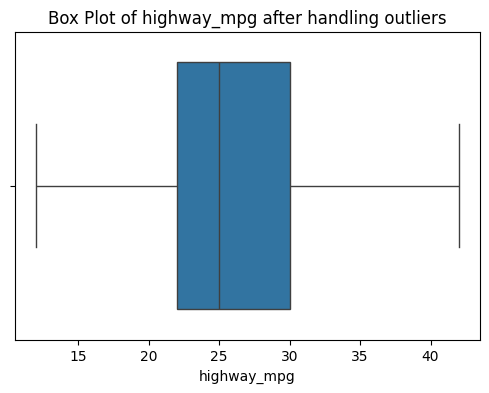

Number of outliers in city_mpg: 248


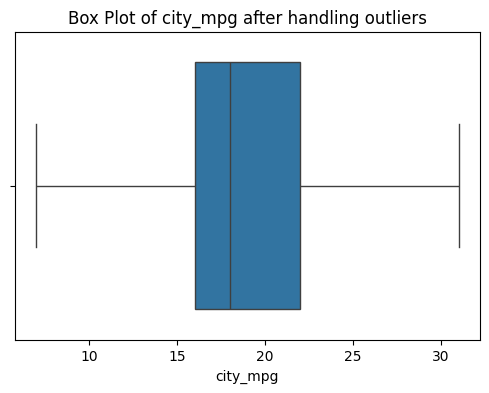

Number of outliers in popularity: 811


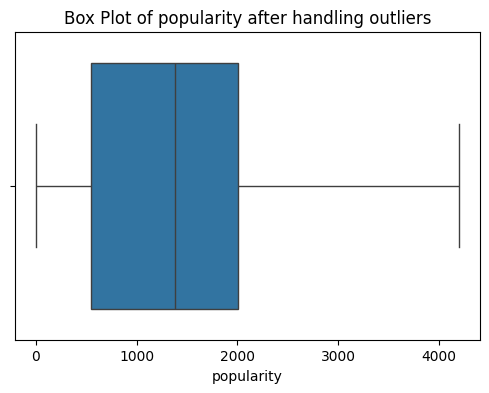

Number of outliers in msrp: 946


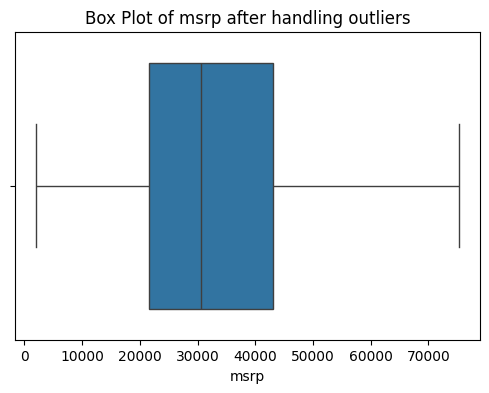

In [325]:
for col in num_cols:
    if col not in ('year', 'number_of_doors', 'engine_cylinders'):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5*IQR
        lower_bound = Q1 - 1.5*IQR

        outliers = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
        print(f'Number of outliers in {col}: {outliers}')

        # Clip outliers
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

        # After Handling Outliers, Plot Boxplot again to confirm
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df, x=col)
        plt.title(f'Box Plot of {col} after handling outliers')
        plt.show()

_`Explore the Histogram of Numerical Columns`_


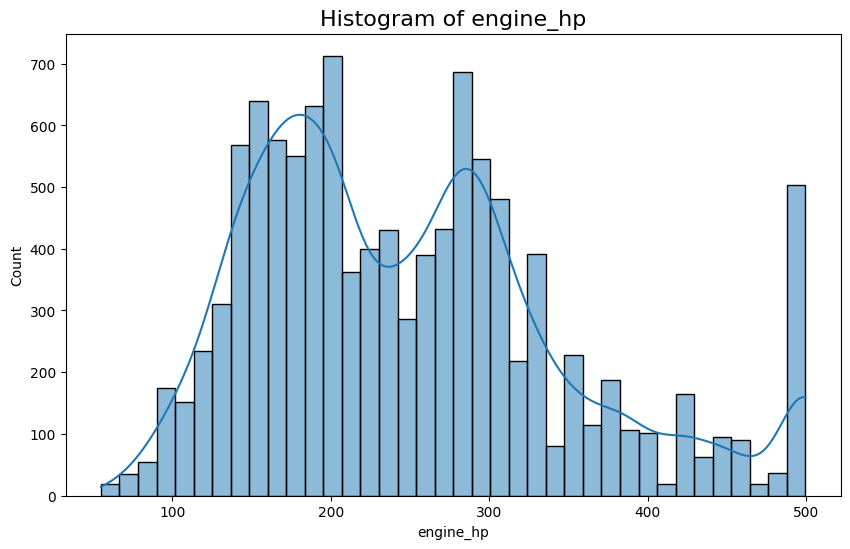

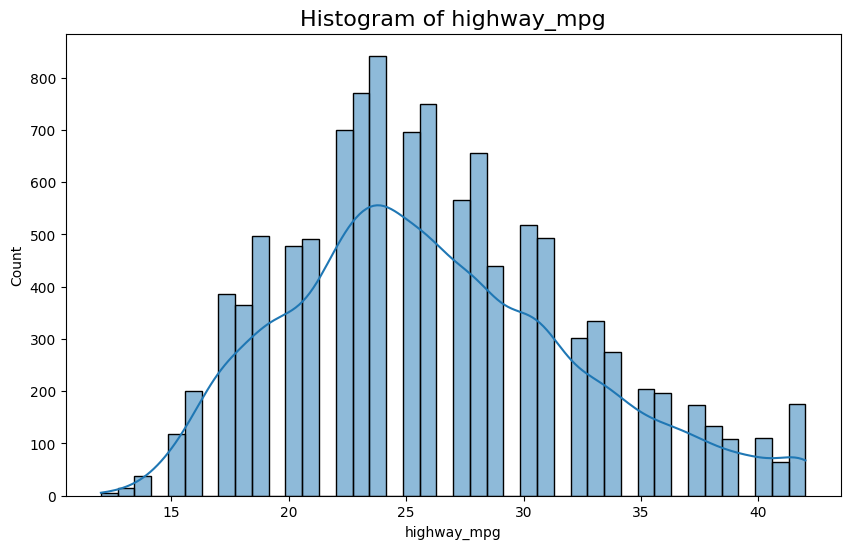

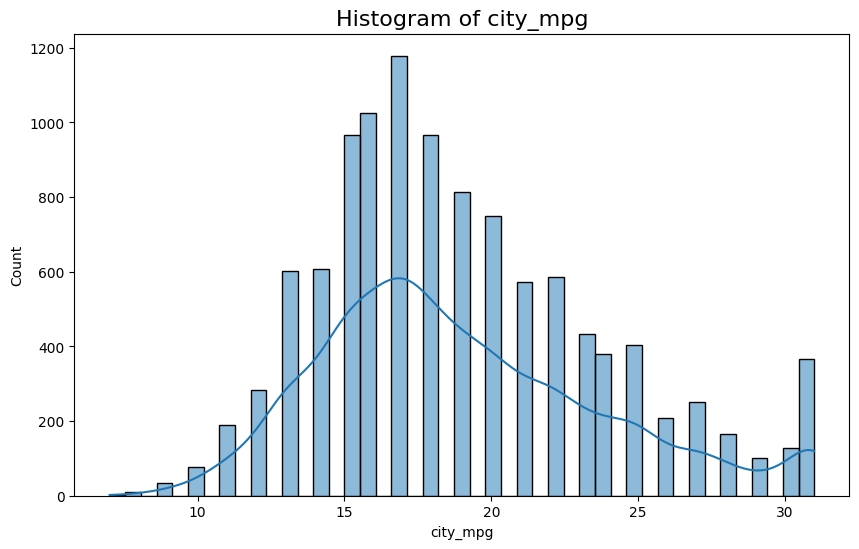

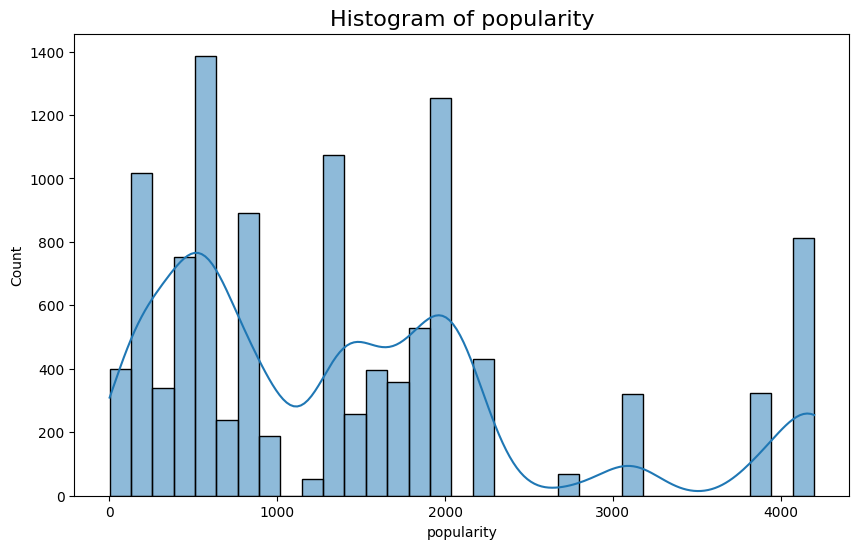

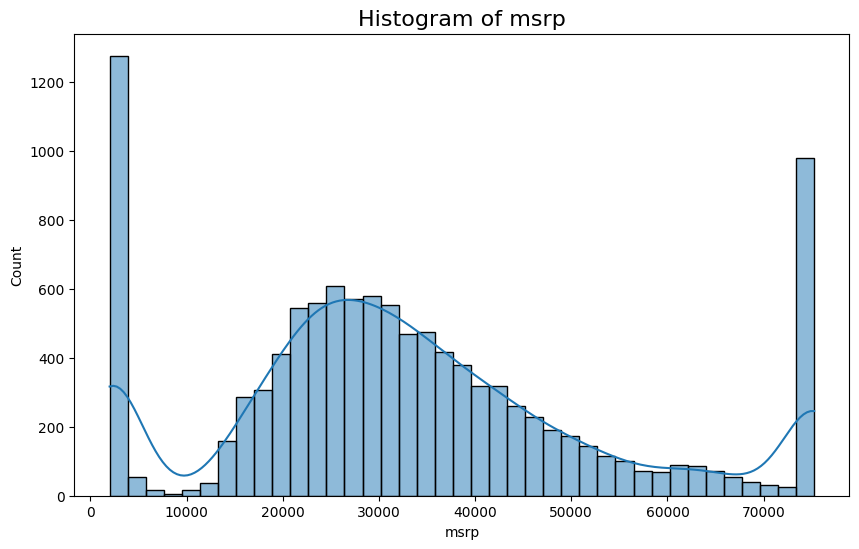

In [326]:
for col in num_cols:
    if col not in ('year', 'number_of_doors', 'engine_cylinders'):
        plt.figure(figsize=(10, 6))
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f'Histogram of {col}', fontsize=16)
        plt.show()

- _`msrp : manufacturer's suggested retail price -> Our Target`_

- _Approximately -> Bell-Shaped Curve As it has Large Peak in Lower& Upper Prices_


In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11092 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11092 non-null  object 
 1   model              11092 non-null  object 
 2   year               11092 non-null  int64  
 3   engine_fuel_type   11092 non-null  object 
 4   engine_hp          11092 non-null  float64
 5   engine_cylinders   11092 non-null  float64
 6   transmission_type  11092 non-null  object 
 7   driven_wheels      11092 non-null  object 
 8   number_of_doors    11092 non-null  float64
 9   vehicle_size       11092 non-null  object 
 10  vehicle_style      11092 non-null  object 
 11  highway_mpg        11092 non-null  int64  
 12  city_mpg           11092 non-null  int64  
 13  popularity         11092 non-null  int64  
 14  msrp               11092 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


- _Missing Value Handling -> Done_
- _Duplicates Handling -> Done_
- _Outliers Handling -> Done_


### _`Prepare Data For Modeling & Split DataFrame into 2 Parts:`_

    1. Training Part (70%)
    2. Testing Part (30%)

- _Categorical Encoding_
- _Feature Scaling_


_`Split the Dataset into Features and Target Column`_


In [328]:
X = df.drop('msrp', axis=1)
y = df['msrp']

X, y

(          make       model  year                engine_fuel_type  engine_hp  \
 0          bmw  1_series_m  2011     premium_unleaded_(required)      335.0   
 1          bmw    1_series  2011     premium_unleaded_(required)      300.0   
 2          bmw    1_series  2011     premium_unleaded_(required)      300.0   
 3          bmw    1_series  2011     premium_unleaded_(required)      230.0   
 4          bmw    1_series  2011     premium_unleaded_(required)      230.0   
 ...        ...         ...   ...                             ...        ...   
 11909    acura         zdx  2012     premium_unleaded_(required)      300.0   
 11910    acura         zdx  2012     premium_unleaded_(required)      300.0   
 11911    acura         zdx  2012     premium_unleaded_(required)      300.0   
 11912    acura         zdx  2013  premium_unleaded_(recommended)      300.0   
 11913  lincoln      zephyr  2006                regular_unleaded      221.0   
 
        engine_cylinders transmission_

In [329]:
X.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'vehicle_size', 'vehicle_style', 'highway_mpg',
       'city_mpg', 'popularity'],
      dtype='object')

#### _`Split Dataset into Training set and Testing set`_


In [330]:
np.random.seed(7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7764, 14), (3328, 14), (7764,), (3328,))

*`Now we select Numerical Features , Features that Need Encoding to bu used in Column Transformer`*

In [331]:
num_features = ['year', 'engine_hp', 'engine_cylinders', 'number_of_doors', 'highway_mpg', 'city_mpg', 'popularity']
ohe_features = ['transmission_type', 'driven_wheels', 'vehicle_size']
target_features = ['make', 'model', 'engine_fuel_type', 'vehicle_style']

*`Pipelines & Transformers`*

In [332]:
numeric_transformer = Pipeline(
    steps = [
        ('scaler', StandardScaler())
    ]
)

ohe_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

target_transformer = Pipeline(steps=[
    ('target_encode', ce.TargetEncoder())
])


# ---------------
# Column Transformer
# ---------------

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_features),
    ('cat_ohe', ohe_transformer, ohe_features),
    ('cat_target', target_transformer, target_features)
])

#### *`Old Way`*

In [333]:
# make, engine_fuel_type, vehicle_style & model columns have high cardinality, so we will use Target Guided Ordinal Encoding for these columns.
# cols_to_encode = ['make', 'model', 'engine_fuel_type', 'vehicle_style']
# for col in cols_to_encode:
#     print(f'Encoding {col}...')
#     df[col] = df.groupby(col)['msrp'].transform('mean')


df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,compact,convertible,28,18,3916,34500


In [334]:
# cat_cols = df.select_dtypes(include='object').columns
# for col in cat_cols:
#     print(col, df[col].nunique())
#     print(df[col].value_counts())
#     print("-"*20)

In [335]:
# Other Categorical Columns can be One-Hot Encoded
# df = pd.get_dummies(data=df, columns=['transmission_type', 'driven_wheels', 'vehicle_size'], drop_first=True)

# df.head()

In [336]:
# bool_cols = df.select_dtypes(include='bool').columns
# # for col in bool_cols:
# #     df[col] = df[col].astype(np.int32)

# df.info()

_`Now, Time For Scaling -> Standard Scaler (Z-Score) Normalization`_


In [337]:
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df)

# # Numpy Array To DataFrame
# df_scaled = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)

# df_scaled.head()

### _`Train a Linear Regression Model (Baseline)`_


In [341]:
model_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [342]:
model_reg.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat_ohe', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [343]:
y_pred = model_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R^2 Score: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

R^2 Score: 0.888595967354323
Mean Squared Error: 45203118.1889703
Mean Absolute Error: 5056.174611765249


### _`Train a RandomForest Regressor`_


In [344]:
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

In [345]:
model_rf.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat_ohe', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [346]:
y_pred = model_rf.fit(X_train, y_train).predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'R^2 Score: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

R^2 Score: 0.9552723571343199
Mean Squared Error: 18148615.258855704
Mean Absolute Error: 2376.9950329470817


_`Random Forest now become more better than Linear Regression, we will do more hyperparameter tuning to increase accuracy`_


### _`📌 Steps to Use Grid Search`_

- Define your model.
- Define the param_grid (a dictionary of hyperparameters and values to try).
- Use GridSearchCV with:
- estimator = your model
- param_grid = parameter grid`

cv = number of folds (e.g. 5 or 10)
scoring = metric (accuracy, F1, RMSE, etc.)

- Fit it to your data.
- Access grid*search.best_params* and grid*search.best_estimator*.

_`### ⚡ Notes`_

- Grid search can be computationally expensive if the grid is large.
- For faster alternatives, you can use RandomizedSearchCV (tries random combinations instead of all).


In [349]:
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}

In [350]:
gs = GridSearchCV(
    estimator=model_rf,           # The model to use
    param_grid=param_grid,  # Dictionary of Hyperparameters to try
    cv=3,       # 3-Fold Cross Validation
    n_jobs=-1,  # run in parallel for speed
    verbose=2,   # print progress
    scoring='r2'
)

gs.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


,estimator,Pipeline(step...Regressor())])
,param_grid,"{'regressor__max_depth': [None, 10, ...], 'regressor__min_samples_leaf': [1, 2], 'regressor__min_samples_split': [2, 5], 'regressor__n_estimators': [100, 200]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat_ohe', ...), ...]"


In [351]:
gs.best_params_

{'regressor__max_depth': 20,
 'regressor__min_samples_leaf': 1,
 'regressor__min_samples_split': 2,
 'regressor__n_estimators': 200}

In [352]:
gs.best_score_

0.9359206555564702

In [353]:
y_pred = gs.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'R^2 Score: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

R^2 Score: 0.9559574813988073
Mean Squared Error: 17870620.35717869
Mean Absolute Error: 2362.2547922166964


### _`Save the Model as a Pickle File`_


*`📌 Two Common Ways to Save a Model in Python`*
1. 1️⃣ Using joblib (recommended for sklearn models)
import joblib
 - Save the model
    - joblib.dump(model, "car_price_model.pkl")

 - Load the model back
    - loaded_model = joblib.load("car_price_model.pkl")

2. 2️⃣ Using pickle
import pickle

 - Save the model
    - with open("car_price_model.pkl", "wb") as f:
        - pickle.dump(model, f)

 - Load the model
    - with open("car_price_model.pkl", "rb") as f:
        - loaded_model = pickle.load(f)

- *`⚡ Which one to use?`*
    - joblib → better for big numpy arrays (common in ML models).
    - pickle → works too, but slightly slower for large data.

*`🔑 Flask Deployment Tip`*
    - Save your model as car_price_model.pkl.

- In your Flask app, load it once at the top:
    - import joblib
    - model = joblib.load("car_price_model.pkl")
- Then use model.predict() inside your /predict route.

In [354]:
best_model = gs.best_estimator_
with open('CarPrice_Model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

_`Now we can use it for Deployment in an Application`_
